# COMPREHENSIVE FINANCIAL HEALTH ASSESSMENT

In [3]:
df.head()

,Unnamed: 0,Countries_Num,id,Countries,Banks,Year,RIR,SFS,INF,ERA,INL,Zscore,DEBT,SIZE,CC,GE,PS,RQ,RL,VA
0,0,1,1,Bénin,Banque Atlantique Bénin,2013,3.836593,26.861971,0.428889,3.196428,12.076596,0.973123,18.503746,12.222694,24.64455,36.96682,58.29384,37.44076,34.27230,55.86855
1,1,1,1,Bénin,Banque Atlantique Bénin,2014,5.599992,29.965430,-0.548758,3.045024,8.884912,1.098355,22.282075,12.271219,29.80769,36.05769,47.14286,31.25000,36.05769,57.14286
2,2,1,1,Bénin,Banque Atlantique Bénin,2015,4.266334,30.984761,0.218786,2.394557,8.583933,0.649069,30.900230,12.511530,33.17308,30.28846,45.23809,30.76923,33.65385,58.62069
3,3,1,1,Bénin,Banque Atlantique Bénin,2016,4.580100,29.832095,-0.794050,3.712403,5.720476,0.846807,35.923350,12.599141,34.13462,33.65385,47.14286,30.28846,30.76923,60.09852
4,4,1,1,Bénin,Banque Atlantique Bénin,2017,7.329021,28.630991,1.769412,3.833422,6.256669,0.599062,39.598463,12.706508,33.17308,26.44231,47.14286,33.17308,30.28846,58.12808


In [4]:
df.isnull().sum()

Unnamed: 0       0
Countries_Num    0
id               0
Countries        0
Banks            0
Year             0
RIR              0
SFS              0
INF              0
ERA              0
INL              0
Zscore           0
DEBT             0
SIZE             0
CC               0
GE               0
PS               0
RQ               0
RL               0
VA               0
dtype: int64

In [5]:
df.describe()

,Unnamed: 0,Countries_Num,id,Year,RIR,SFS,INF,ERA,INL,Zscore,DEBT,SIZE,CC,GE,PS,RQ,RL,VA
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,370.500000,4.575472,53.500000,2016.000000,3.711618,31.965249,0.524620,9.766718,11.652364,2.967964,38.780738,12.077644,37.292780,26.747784,23.891205,35.432019,32.653598,41.074591
std,214.341239,2.316191,30.618842,2.001349,4.114070,8.239127,1.269270,18.965490,10.885343,5.123174,11.664036,1.114687,12.589451,10.261396,14.741995,9.474103,10.138651,11.071831
min,0.000000,1.000000,1.000000,2013.000000,-23.137938,15.829639,-3.233389,-179.747455,0.000000,-47.777093,18.503746,8.677440,13.461540,8.530806,3.773585,13.942310,6.250000,18.309860
25%,185.250000,3.000000,27.000000,2014.000000,3.367054,26.927042,-0.258090,4.166364,4.656050,1.482417,30.666445,11.359607,27.403850,18.009480,12.857140,28.365390,27.403850,33.004920
50%,370.500000,5.000000,53.500000,2016.000000,4.266334,29.918364,0.685881,7.460494,8.895584,2.149078,36.494147,12.156868,33.173080,26.442310,17.061610,34.134620,30.769230,38.423650
75%,555.750000,7.000000,80.000000,2018.000000,5.599992,37.793417,1.318153,11.520829,14.951115,3.468952,44.508726,12.891855,49.038460,35.096150,38.571430,43.269230,36.057690,53.490507
max,741.000000,8.000000,106.000000,2019.000000,7.578020,51.682209,2.967604,179.056370,79.606396,39.380715,65.870037,14.582210,58.653850,50.961540,58.293840,52.606640,53.846150,60.098520


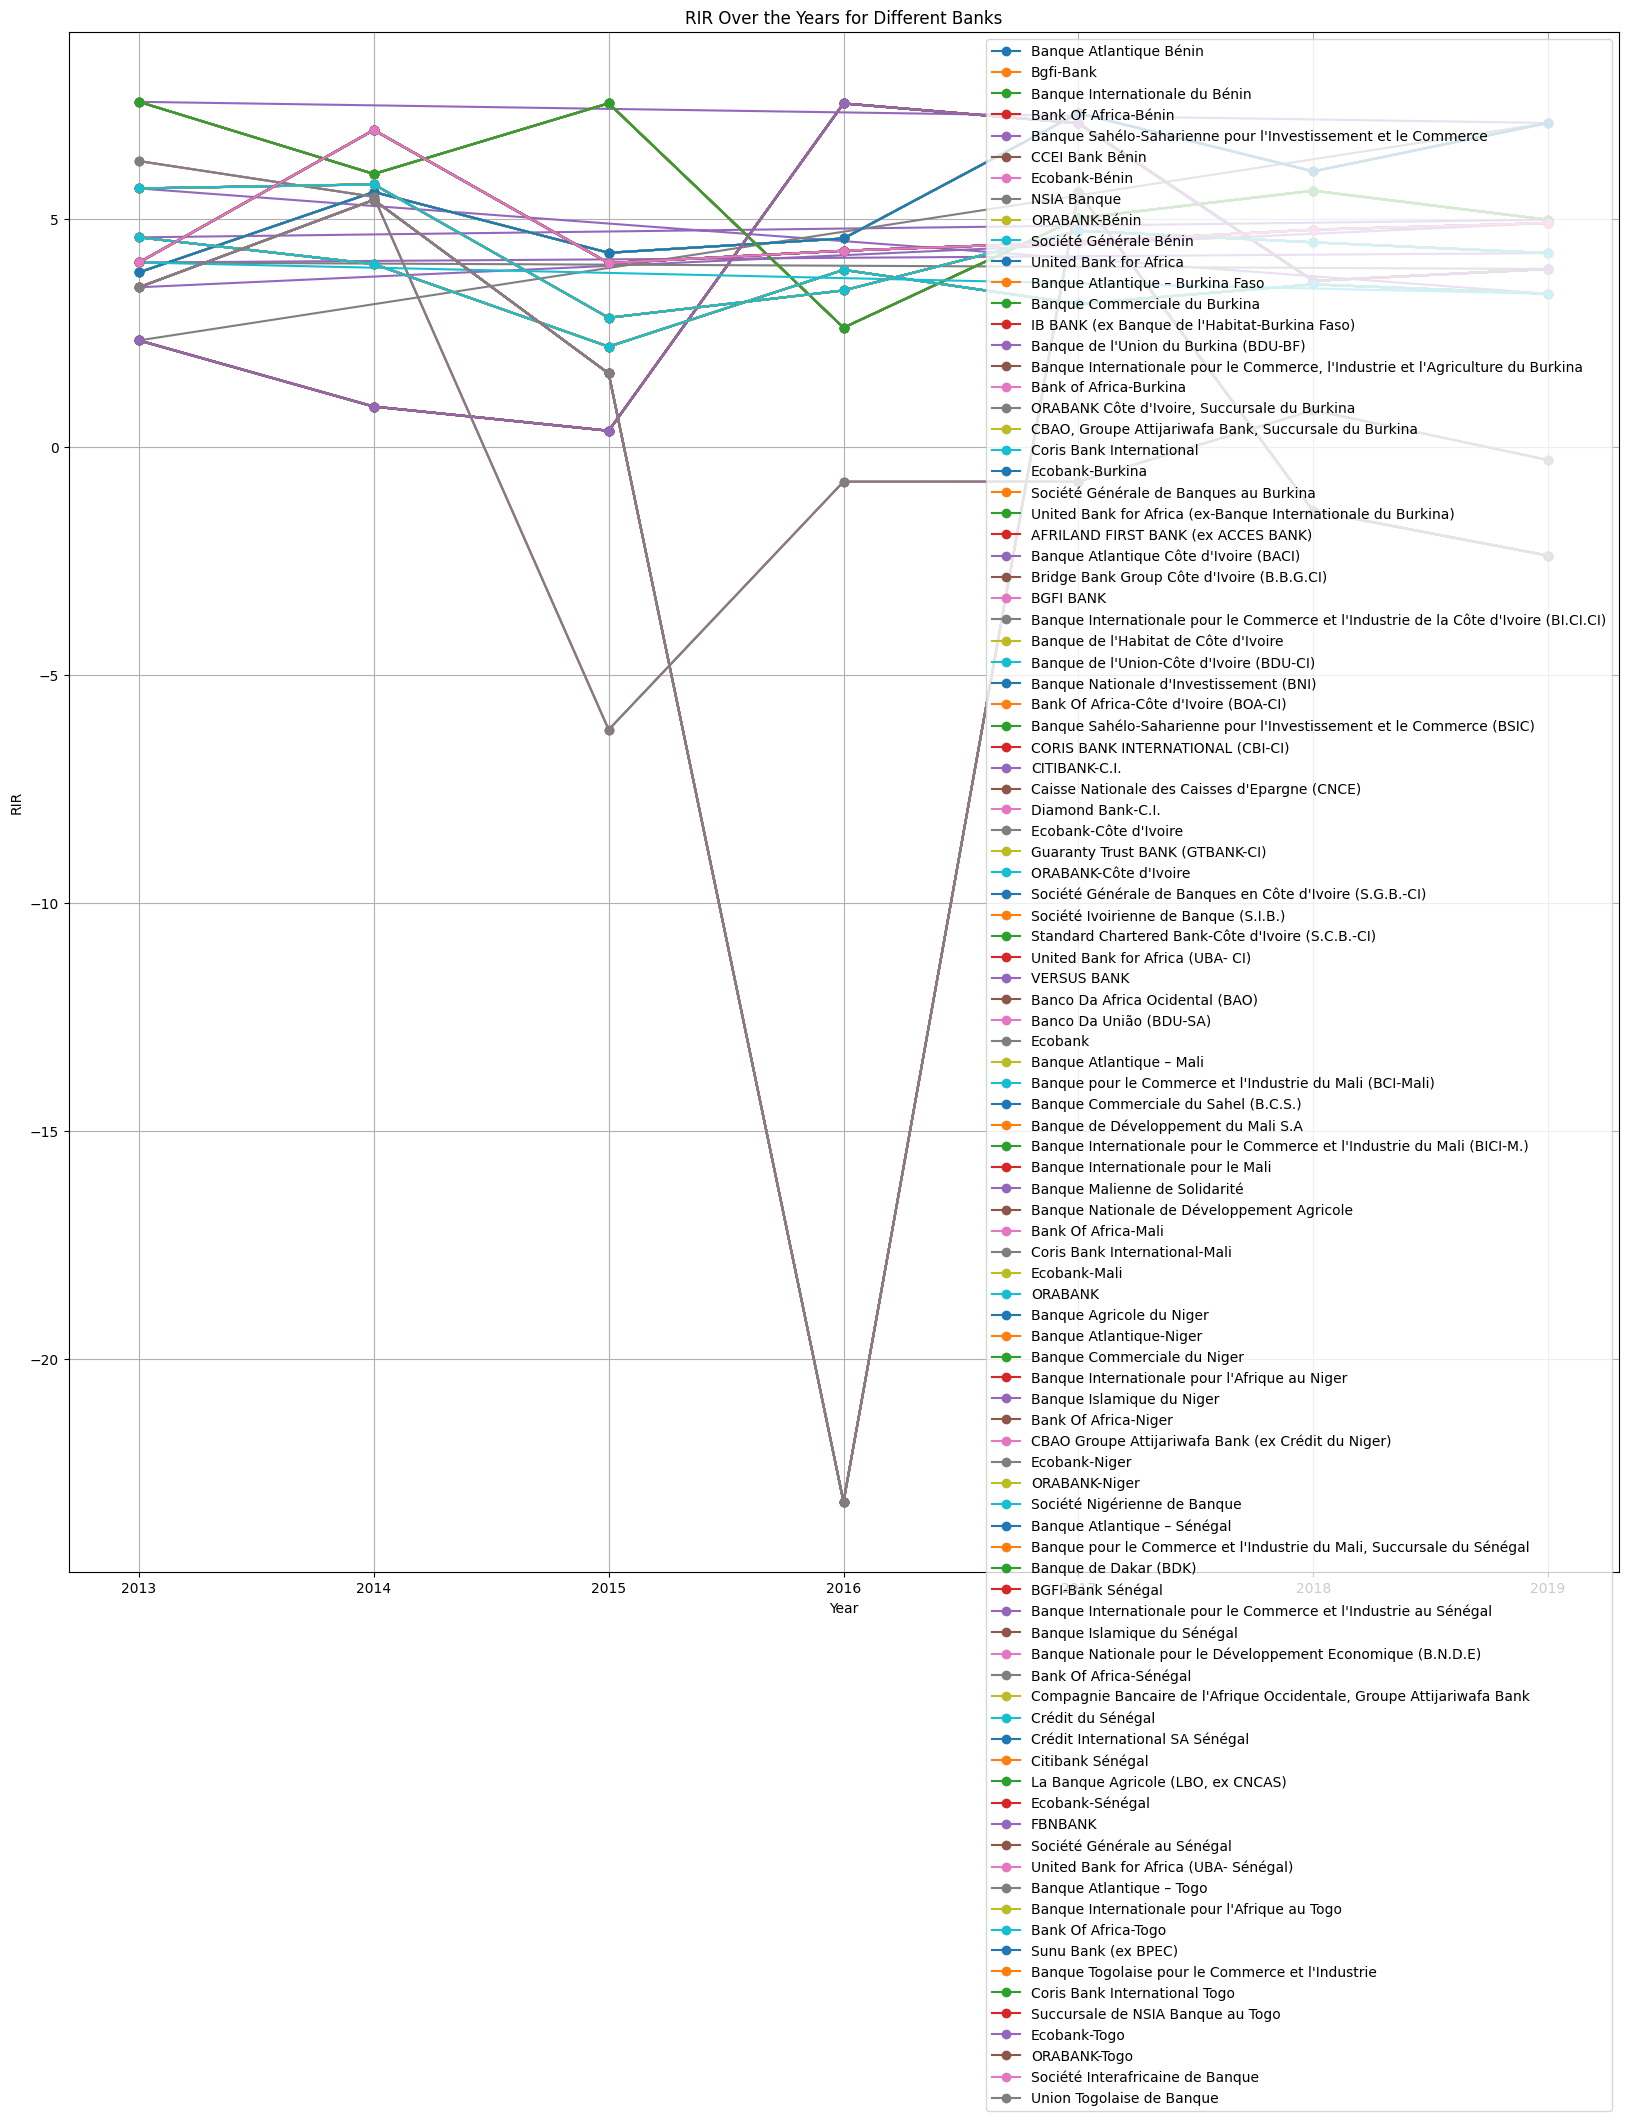

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
for bank in df['Banks'].unique():
    bank_data = df[df['Banks'] == bank]
    plt.plot(bank_data['Year'], bank_data['RIR'], marker='o', label=bank)

plt.title('RIR Over the Years for Different Banks')
plt.xlabel('Year')
plt.ylabel('RIR')
plt.legend()
plt.grid(True)
plt.show()

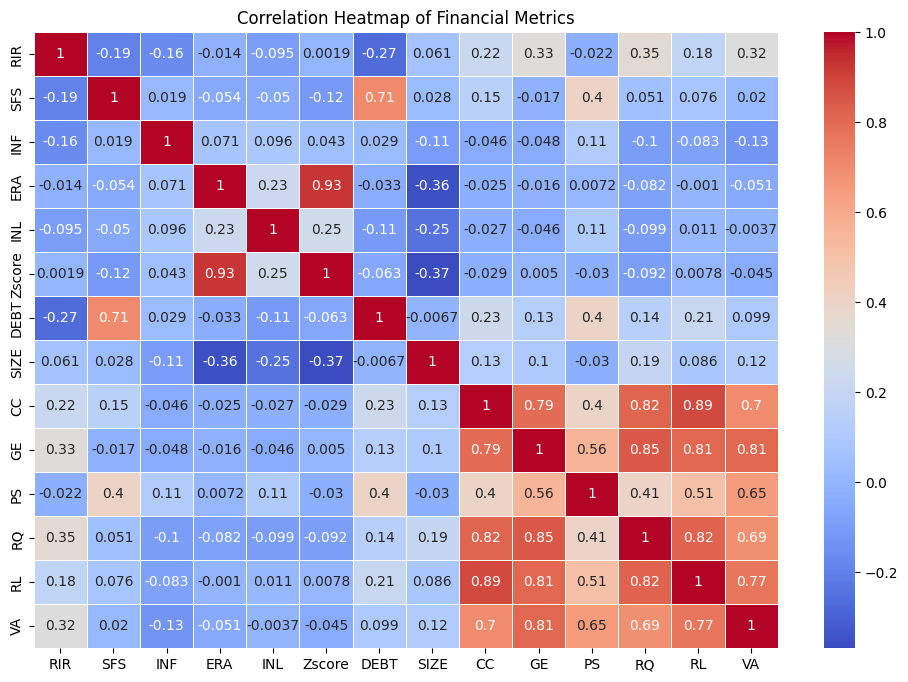

In [9]:
import seaborn as sns
numerical_columns = ['RIR', 'SFS', 'INF', 'ERA', 'INL', 'Zscore', 'DEBT', 'SIZE', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Financial Metrics')
plt.show()

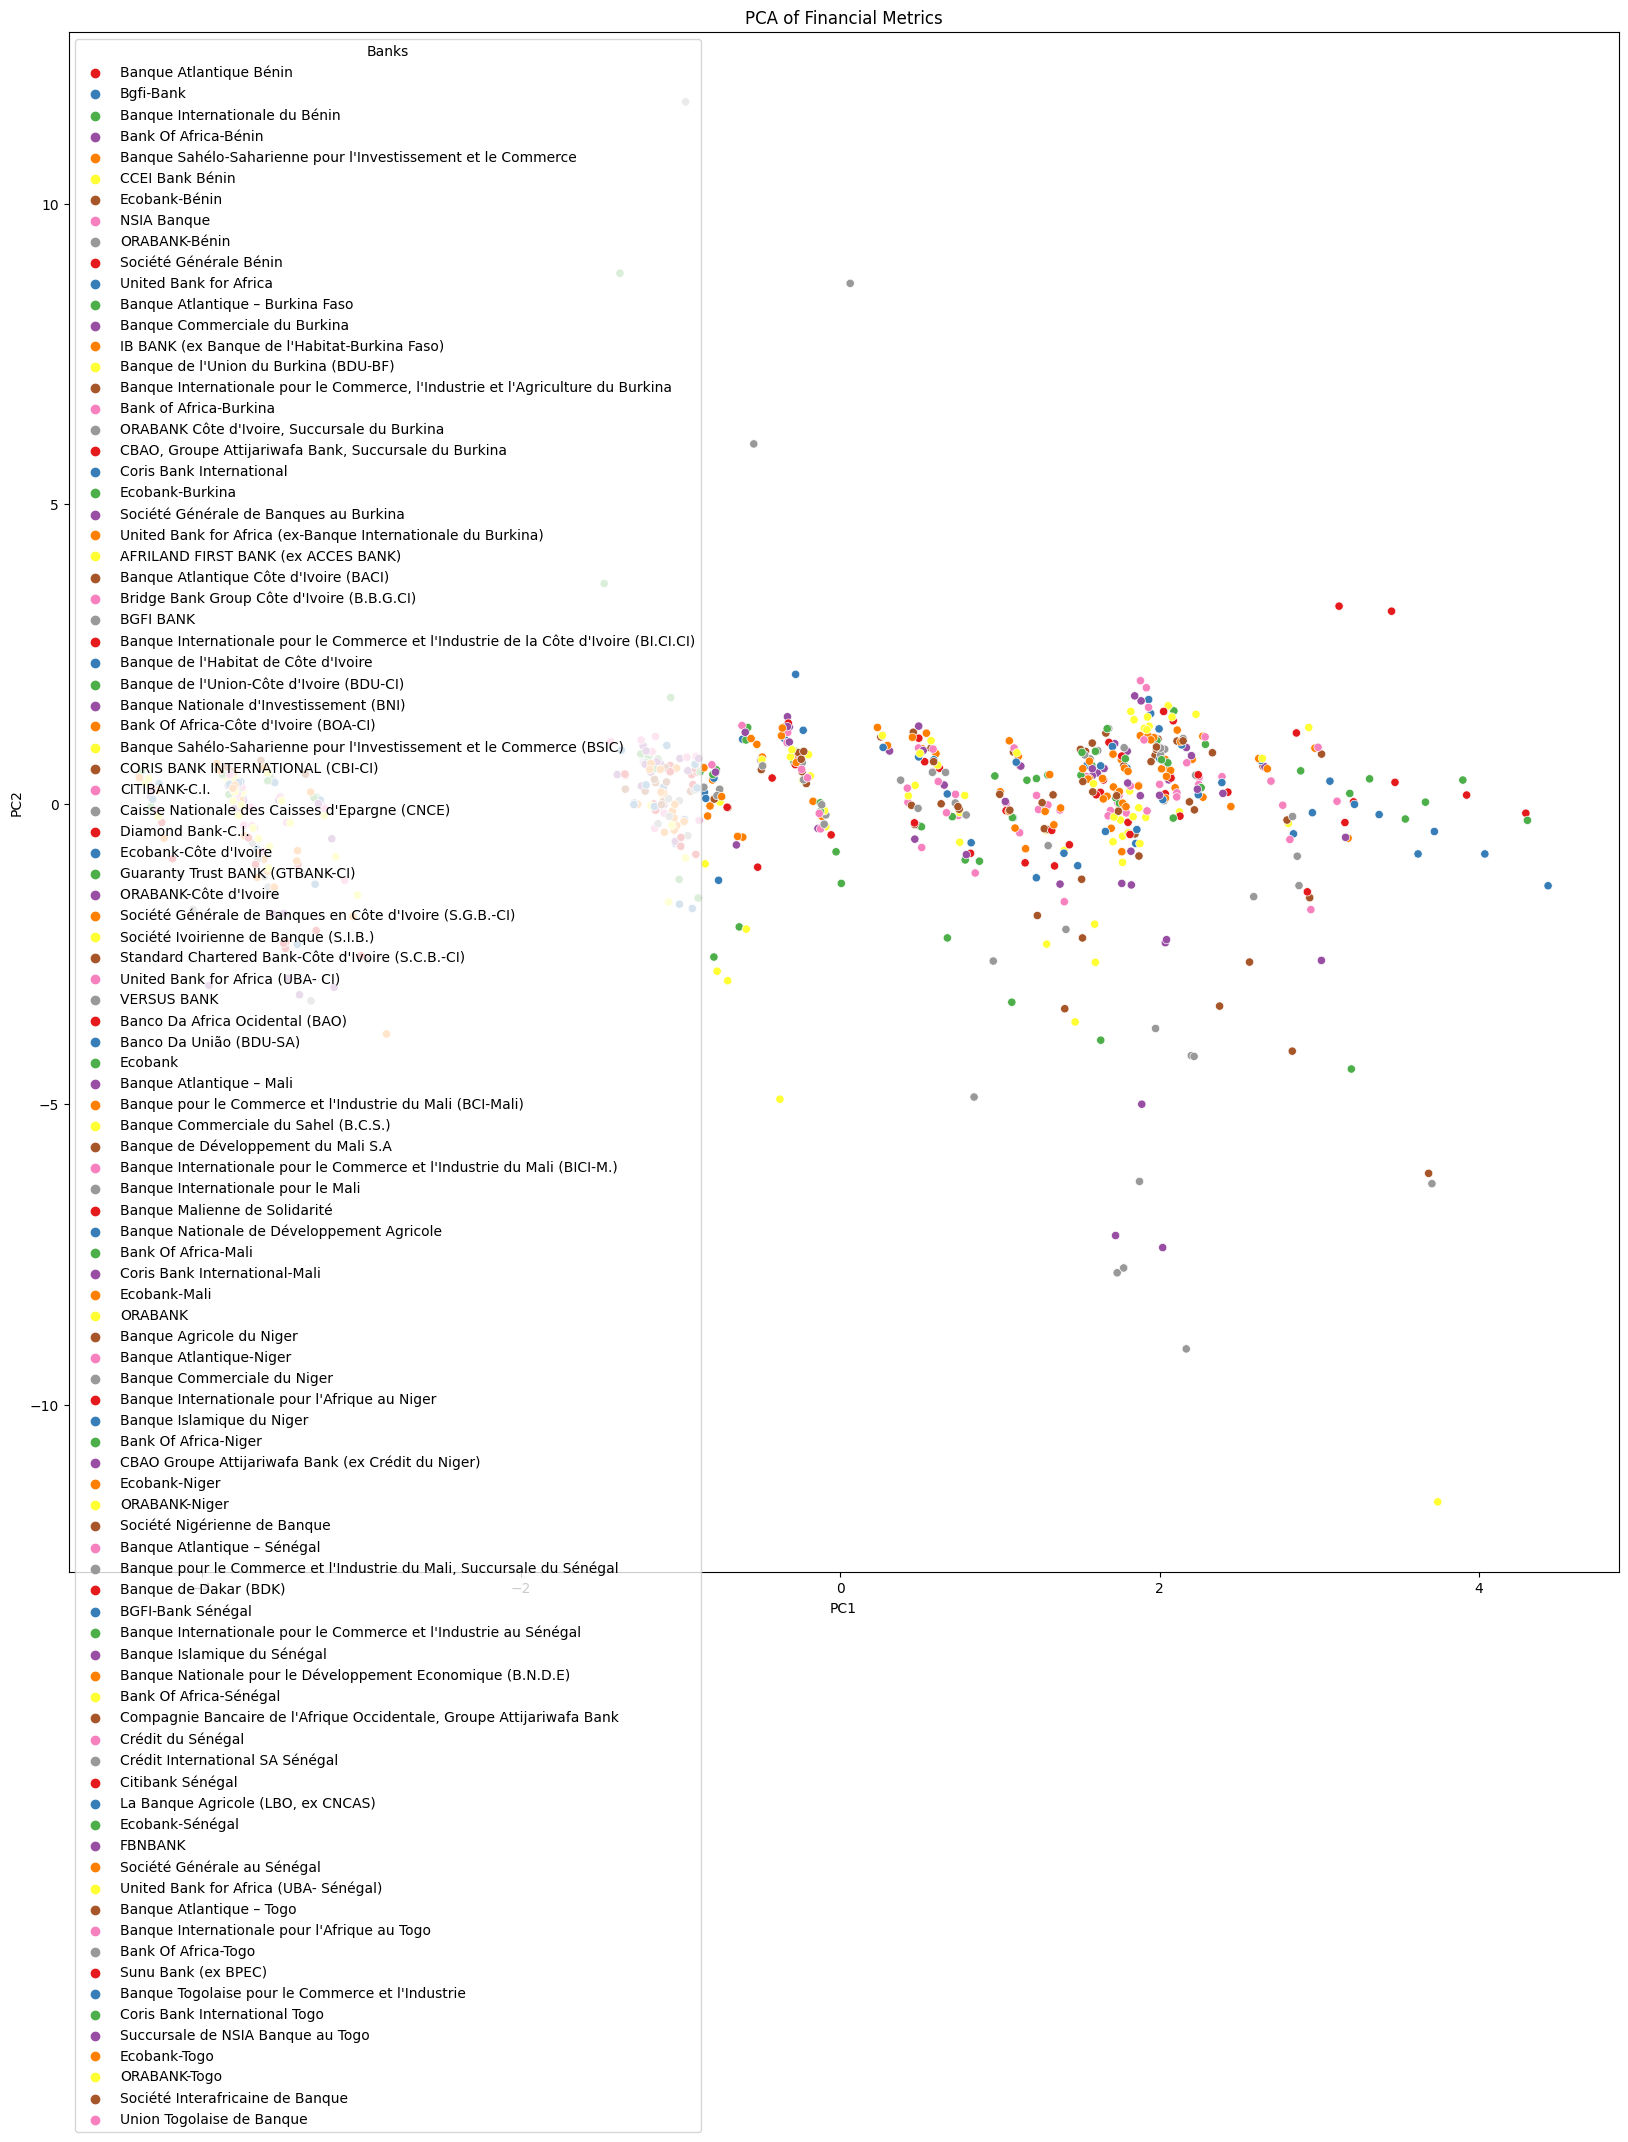

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

numerical_columns = ['RIR', 'SFS', 'INF', 'ERA', 'INL', 'Zscore', 'DEBT', 'SIZE', 'CC', 'GE', 'PS', 'RQ', 'RL', 'VA']
x = StandardScaler().fit_transform(df[numerical_columns])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

final_df = pd.concat([principal_df, df[['Banks']]], axis=1)

plt.figure(figsize=(20, 20))
sns.scatterplot(x='PC1', y='PC2', hue='Banks', data=final_df, palette='Set1')
plt.title('PCA of Financial Metrics')
plt.show()


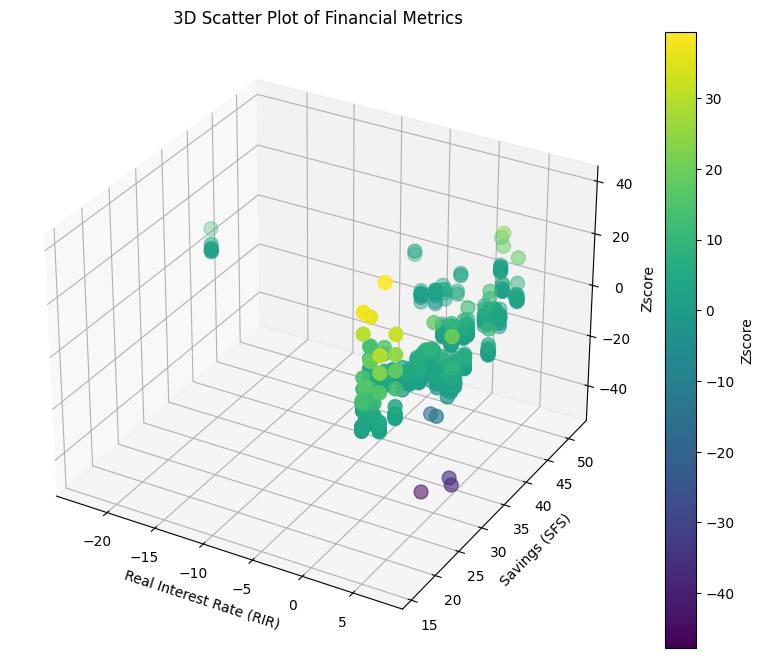

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

rir = df['RIR']
sfs = df['SFS']
zscore = df['Zscore']
banks = df['Banks']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(rir, sfs, zscore, c=zscore, cmap='viridis', s=100)

ax.set_xlabel('Real Interest Rate (RIR)')
ax.set_ylabel('Savings (SFS)')
ax.set_zlabel('Zscore')
ax.set_title('3D Scatter Plot of Financial Metrics')

cbar = plt.colorbar(scatter)
cbar.set_label('Zscore')

plt.show()


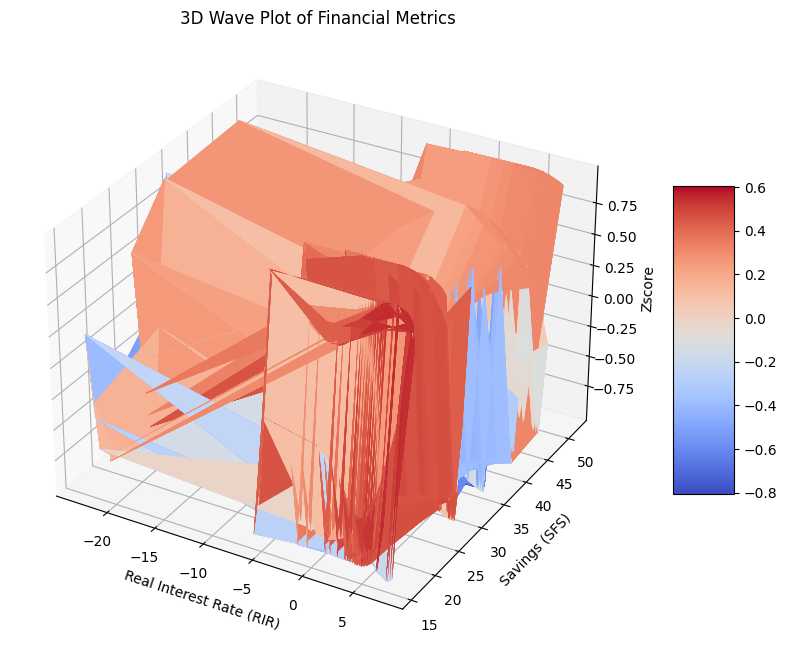

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = df['RIR']
y = df['SFS']
z = df['Zscore']

X, Y = np.meshgrid(x, y)

Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='coolwarm')

ax.set_xlabel('Real Interest Rate (RIR)')
ax.set_ylabel('Savings (SFS)')
ax.set_zlabel('Zscore')
ax.set_title('3D Wave Plot of Financial Metrics')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()


In [16]:
import pandas as pd

df['Net Profit Margin'] = df['CC'] / df['SIZE']
df['ROA'] = df['CC'] / df['SIZE']
df['ROE'] = df['CC'] / (df['SIZE'] - df['DEBT'])

df['Debt to Equity Ratio'] = df['DEBT'] / (df['SIZE'] - df['DEBT'])
df['Interest Coverage Ratio'] = df['RIR'] / df['DEBT']

df['Asset Turnover Ratio'] = df['GE'] / df['SIZE']

print(df[['Net Profit Margin', 'ROA', 'ROE', 'Debt to Equity Ratio', 'Interest Coverage Ratio', 'Asset Turnover Ratio']])


     Net Profit Margin       ROA       ROE  Debt to Equity Ratio   
0             2.016294  2.016294 -3.923634             -2.945963  \
1             2.429073  2.429073 -2.977537             -2.225791   
2             2.651401  2.651401 -1.803993             -1.680392   
3             2.709281  2.709281 -1.463485             -1.540174   
4             2.610716  2.610716 -1.233569             -1.472502   
..                 ...       ...       ...                   ...   
737           2.080825  2.080825 -0.620535             -1.298216   
738           2.266670  2.266670 -0.595514             -1.262726   
739           2.030753  2.030753 -0.578298             -1.284770   
740           2.030908  2.030908 -0.573147             -1.282212   
741           2.080653  2.080653 -0.651078             -1.312920   

     Interest Coverage Ratio  Asset Turnover Ratio  
0                   0.207341              3.024441  
1                   0.251323              2.938395  
2                   0.13

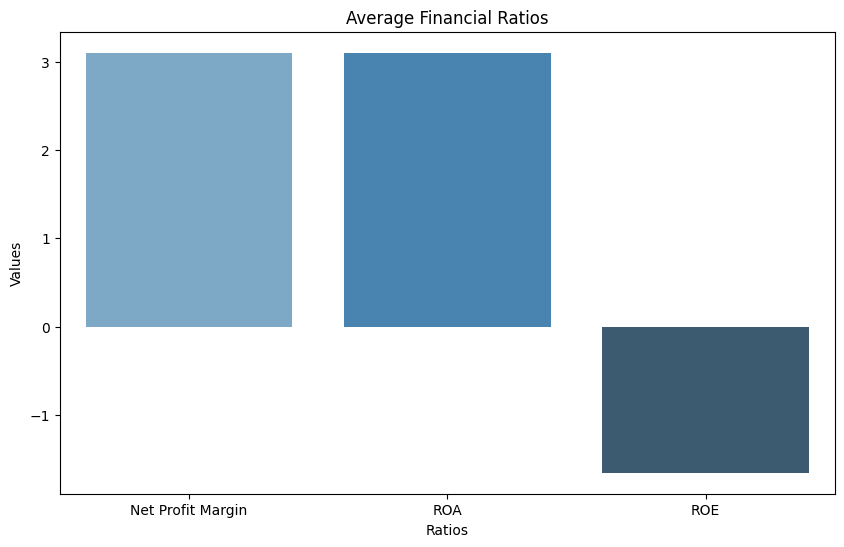

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

ratios = ['Net Profit Margin', 'ROA', 'ROE']
data_ratios = df[ratios].mean()  
plt.figure(figsize=(10, 6))
sns.barplot(x=data_ratios.index, y=data_ratios.values, palette="Blues_d")
plt.title('Average Financial Ratios')
plt.xlabel('Ratios')
plt.ylabel('Values')
plt.show()


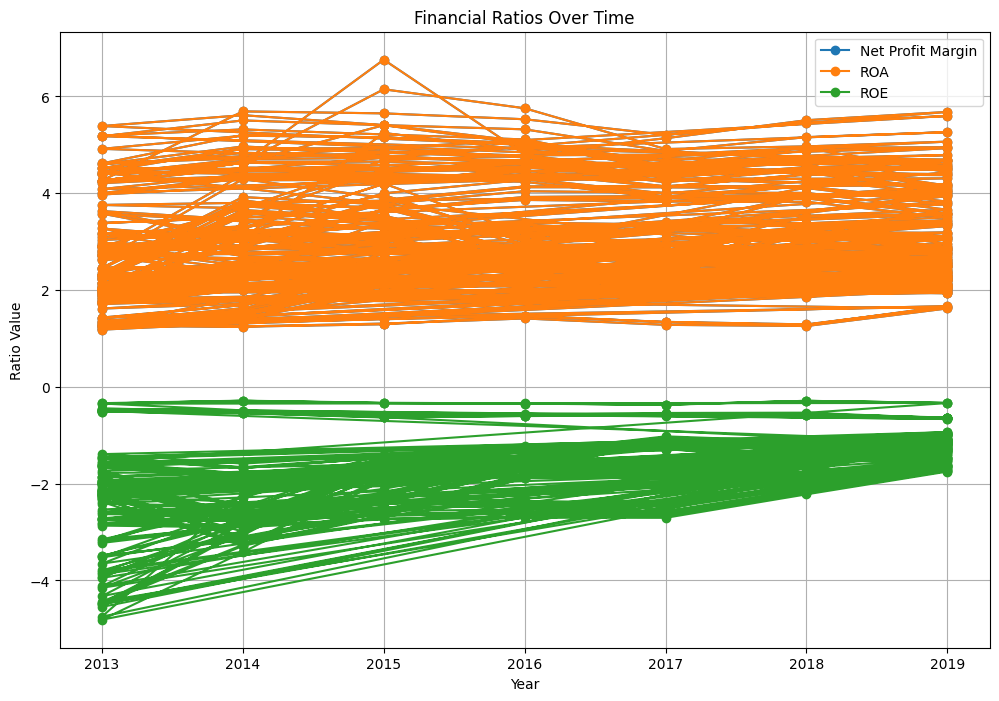

In [24]:

plt.figure(figsize=(12, 8))
for ratio in ratios:
    plt.plot(df['Year'], df[ratio], marker='o', label=ratio)

plt.title('Financial Ratios Over Time')
plt.xlabel('Year')
plt.ylabel('Ratio Value')
plt.legend()
plt.grid(True)
plt.show()


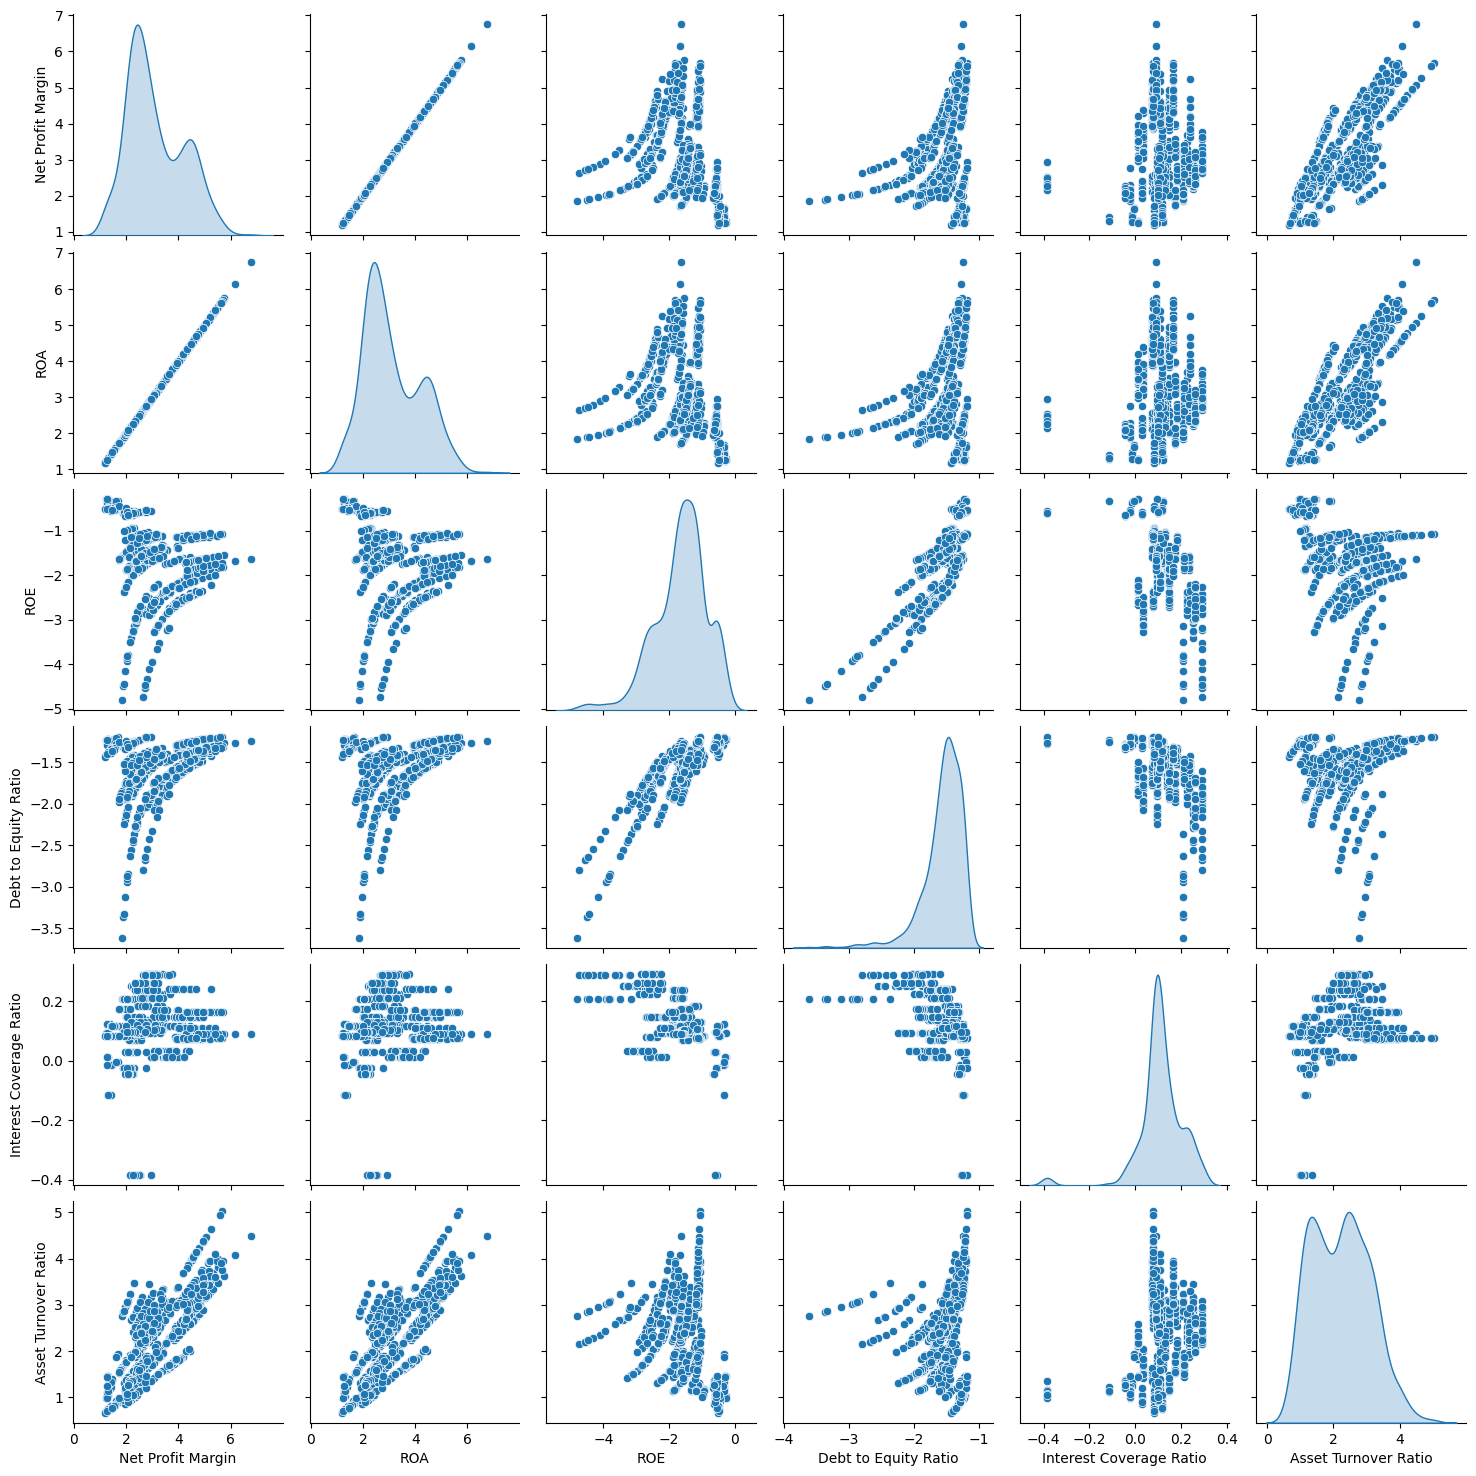

In [25]:

sns.pairplot(df[['Net Profit Margin', 'ROA', 'ROE', 'Debt to Equity Ratio', 'Interest Coverage Ratio', 'Asset Turnover Ratio']], diag_kind='kde')
plt.show()


# SWOT Analysis

In [38]:

import pandas as pd

df = pd.DataFrame(df)
average_revenue_growth = None
average_operating_margin = None
average_ROE = None

if 'DEBT' in df.columns:
    average_revenue_growth = (df['DEBT'].iloc[-1] - df['DEBT'].iloc[0]) / df['DEBT'].iloc[0] * 100
else:
    print("'DEBT' column is not found in the DataFrame")

if 'SFS' in df.columns:
    average_operating_margin = df['SFS'].mean()
else:
    print("'SFS' column is not found in the DataFrame")

if 'RIR' in df.columns:
    average_ROE = df['RIR'].mean() * 100
else:
    print("'RIR' column is not found in the DataFrame")

if average_revenue_growth is not None and average_operating_margin is not None and average_ROE is not None:
    print(f"Strengths: Average revenue growth of {average_revenue_growth:.2f}%, Average operating margin of {average_operating_margin:.2f}%, Positive ROE of {average_ROE:.2f}%")
else:
    print("Unable to calculate some metrics due to missing columns.")

Strengths: Average revenue growth of 114.00%, Average operating margin of 29.26%, Positive ROE of 512.24%


Risks

In [39]:
import pandas as pd
import numpy as np

df = pd.DataFrame(df)

df['RIR_Return'] = df['RIR'].pct_change().dropna() * 100

def calculate_var(returns, confidence_level=0.95):
    return np.percentile(returns, (1 - confidence_level) * 100)

var = calculate_var(df['RIR_Return'])
print(f"Value at Risk (VaR) at 95% confidence level: {var:.2f}%")


Value at Risk (VaR) at 95% confidence level: nan%


In [54]:
import pandas as pd


df = pd.DataFrame(data)

debt_summary = df.describe()
print("Debt Summary:\n", debt_summary)


Debt Summary:
               Year  Banque Atlantique Bénin  Bgfi-Bank
count     7.000000                 7.000000   7.000000
mean   2016.000000                29.928571  25.714286
std       2.160247                 8.477561   4.572173
min    2013.000000                18.500000  20.000000
25%    2014.500000                23.500000  22.000000
50%    2016.000000                30.000000  26.000000
75%    2017.500000                36.500000  29.000000
max    2019.000000                41.000000  32.000000


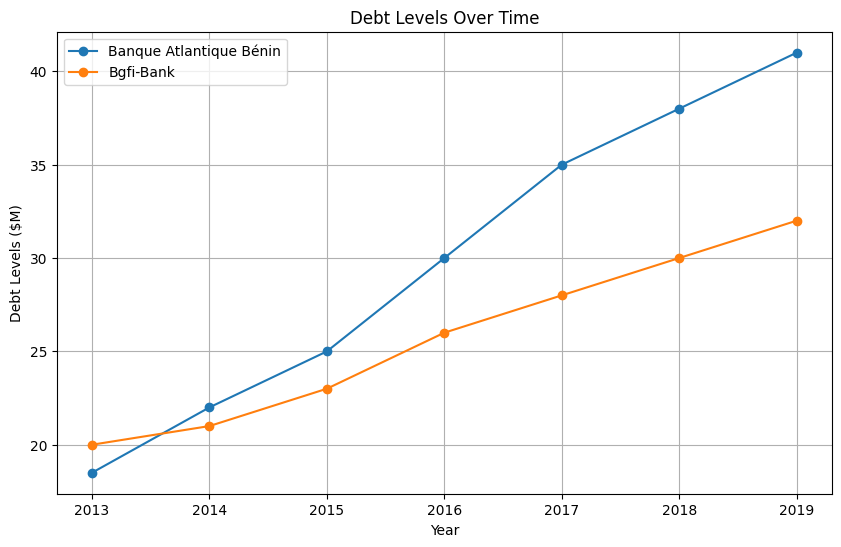

In [53]:
import matplotlib.pyplot as plt

data = {
    'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'Banque Atlantique Bénin': [18.50, 22.00, 25.00, 30.00, 35.00, 38.00, 41.00],
    'Bgfi-Bank': [20.00, 21.00, 23.00, 26.00, 28.00, 30.00, 32.00]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Banque Atlantique Bénin'], label='Banque Atlantique Bénin', marker='o')
plt.plot(df['Year'], df['Bgfi-Bank'], label='Bgfi-Bank', marker='o')
plt.xlabel('Year')
plt.ylabel('Debt Levels ($M)')
plt.title('Debt Levels Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [51]:


df = pd.DataFrame(df)

revenue_summary = df.describe()
print("Revenue Summary:\n", revenue_summary)


Revenue Summary:
        Initial Investment ($)       NPV ($)
count                     3.0      3.000000
mean                 150000.0  10661.157025
std                   50000.0  43365.283082
min                  100000.0 -16694.214876
25%                  125000.0 -14338.842975
50%                  150000.0 -11983.471074
75%                  175000.0  24338.842975
max                  200000.0  60661.157025


In [47]:

df['Revenue Growth (%)'] = df['Revenue ($)'].pct_change() * 100
print("Revenue Growth:\n", df)


Revenue Growth:
      Product  Revenue ($)  Revenue Growth (%)
0  Product A       500000                 NaN
1  Product B       300000          -40.000000
2  Product C       400000           33.333333
3  Product D       250000          -37.500000


In [48]:
import numpy as np

data = {
    'Project': ['Project X', 'Project Y', 'Project Z'],
    'Initial Investment ($)': [200000, 150000, 100000],
    'Cash Flows ($)': [[50000, 70000, 90000], [30000, 50000, 70000], [40000, 60000, 80000]]
}

df = pd.DataFrame(data)

def calculate_npv(cash_flows, discount_rate):
    npv = np.sum([cf / (1 + discount_rate)**i for i, cf in enumerate(cash_flows)])
    return npv
discount_rate = 0.10
df['NPV ($)'] = df['Cash Flows ($)'].apply(lambda x: calculate_npv(x, discount_rate)) - df['Initial Investment ($)']
print("NPV of Each Project:\n", df[['Project', 'NPV ($)']])


NPV of Each Project:
      Project       NPV ($)
0  Project X -11983.471074
1  Project Y -16694.214876
2  Project Z  60661.157025


In [49]:
from sklearn.linear_model import LinearRegression
import numpy as np

years = np.array([2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape(-1, 1)
revenue = np.array([500000, 550000, 600000, 650000, 700000, 750000, 800000])

model = LinearRegression()
model.fit(years, revenue)

# Predict future revenue
future_years = np.array([2020, 2021, 2022]).reshape(-1, 1)
future_revenue = model.predict(future_years)
print("Future Revenue Projections:\n", future_revenue)


Future Revenue Projections:
 [850000. 900000. 950000.]


In [50]:
# Fit linear model for debt
debt = np.array([20.00, 22.00, 25.00, 30.00, 35.00, 38.00, 41.00])
model.fit(years, debt)

# Predict future costs
future_debt = model.predict(future_years)
print("Future Debt Projections:\n", future_debt)


Future Debt Projections:
 [45.14285714 48.89285714 52.64285714]
